In [2]:
# CONFIG
import os

LA_DIR = '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/LA'
TGT_DIR = '/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA'
S1_DIR = '/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/S1'

if not os.path.exists(TGT_DIR):
    os.mkdir(TGT_DIR)

if not os.path.exists(S1_DIR):
    os.mkdir(S1_DIR)

In [4]:
import glob
la_list = sorted(glob.glob(os.path.join(LA_DIR, '*.csv')))
len(la_list), la_list[0]

(1600,
 '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/LA/2000.csv')

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_image(filename):
    name = filename.split('/')[-1].split('.')[0]
    col_names = ['x1', 'y1', 'x2', 'y2']
    df = pd.read_csv(filename, names=col_names)
    image_path = os.path.join(LA_DIR, name+'.jpg')
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    df[['x1', 'x2']] = df[['x1', 'x2']].apply(lambda x: np.rint(x*w)).astype('int')
    df[['y1', 'y2']] = df[['y1', 'y2']].apply(lambda y: np.rint(y*h)).astype('int')

    # create new dataframe
    for i in range(len(df)//2):
        # data = []
        padding = 5
        x1, y1, x2, y2 = df.iloc[2*i]
        x3, y3, x4, y4 = df.iloc[2*i+1]
        min_x = min([x1, x2, x3, x4])
        max_x = max([x1, x2, x3, x4])
        min_y = min([y1, y2, y3, y4])
        max_y = max([y1, y2, y3, y4])
        data = [{
            'name': name+f'_{i}',
            'x1': x1 - min_x + padding,
            'y1': y1 - min_y + padding,
            'x2': x2 - min_x + padding,
            'y2': y2 - min_y + padding,
            'x3': x3 - min_x + padding,
            'y3': y3 - min_y + padding,
            'x4': x4 - min_x + padding,
            'y4': y4 - min_y + padding,
            'min_x': min_x,
            'min_y': min_y,
            'max_x': max_x,
            'max_y': max_y,
        }]
        prep_df = pd.DataFrame(data)
        prep_df.to_csv(os.path.join(TGT_DIR, name+f'_{i}.csv'), index=False)

        # crop&save image
        cropped_image = image[min_y-padding:max_y+padding, min_x-padding:max_x+padding]
        cv2.imwrite(os.path.join(TGT_DIR, name+f'_{i}.jpg'), cropped_image)

    # CASE: S1
    padding = 5
    x1, y1, x2, y2 = df.iloc[-2]
    x3, y3, x4, y4 = df.iloc[-1]
    min_x = min([x1, x2, x3, x4])
    max_x = max([x1, x2, x3, x4])
    min_y = min([y1, y2, y3, y4])
    max_y = max([y1, y2, y3, y4])
    data = [{
        'name': name+f'_{i}',
        'x1': x3 - min_x + padding,
        'y1': y3 - min_y + padding,
        'x2': x4 - min_x + padding,
        'y2': y4 - min_y + padding,
        'min_x': min_x,
        'min_y': min_y,
        'max_x': max_x,
        'max_y': max_y,
    }]
    prep_df = pd.DataFrame(data)
    prep_df.to_csv(os.path.join(S1_DIR, name+f'_{i}.csv'), index=False)

    # crop&save image
    cropped_image = image[min_y-padding:max_y+padding, min_x-padding:max_x+padding]
    cv2.imwrite(os.path.join(S1_DIR, name+f'_{i}.jpg'), cropped_image)


    # # Plot points and bbox
    # point_radius = 5
    # point_color = (255, 0, 0)
    # point_thickness = 2
    # bbox_color = (0, 255, 0)
    # bbox_thickness = 2
    # bbox_pad = 5
    # for _, (x1, y1, x2, y2, x3, y3, x4, y4, min_x, min_y, max_x, max_y) in prep_df.iterrows():
    #     for point in [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]:
    #         cv2.circle(image, point, point_radius, point_color, point_thickness)
    #     cv2.rectangle(image, (min_x - bbox_pad, min_y - bbox_pad), (max_x + bbox_pad, max_y + bbox_pad),bbox_color, bbox_thickness)

    # plt.imshow(image)
    # plt.show()

In [6]:
from tqdm import tqdm
for path in tqdm(la_list):
    get_image(path)

  0%|          | 0/1600 [00:00<?, ?it/s]

100%|██████████| 1600/1600 [01:33<00:00, 17.05it/s]


## LA

In [7]:
import glob

csv_list = sorted(glob.glob(os.path.join(TGT_DIR, '*.csv')))

data_frames = []
for file_path in csv_list:
    data = pd.read_csv(file_path)
    data_frames.append(data)

combined_df = pd.concat(data_frames, ignore_index=True)
combined_df

,name,x1,y1,x2,y2,x3,y3,x4,y4,min_x,min_y,max_x,max_y
0,2000_0,33,5,251,29,5,181,226,229,581,353,827,577
1,2000_1,48,5,283,44,5,180,230,242,527,568,805,805
2,2000_2,51,5,282,50,5,202,234,245,467,785,744,1025
3,2000_3,25,5,268,11,5,187,223,207,430,1057,693,1259
4,2000_4,5,44,245,5,30,233,248,184,427,1295,670,1523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,3599_0,41,5,244,37,5,157,225,192,854,548,1093,735
7996,3599_1,38,5,255,31,5,164,240,184,802,752,1052,931
7997,3599_2,18,7,244,5,5,166,239,152,779,985,1018,1146
7998,3599_3,5,58,236,5,23,212,253,146,781,1184,1029,1391


In [8]:
combined_df.to_csv(os.path.join(TGT_DIR, 'LA_crop.csv'), index=False)

In [9]:
import pandas as pd
import os

np.random.seed(42)
la_df = pd.read_csv(os.path.join(TGT_DIR, 'LA_crop.csv'))
la_df = la_df.sample(n=2000).reset_index(drop=True)
la_df

,name,x1,y1,x2,y2,x3,y3,x4,y4,min_x,min_y,max_x,max_y
0,2443_0,63,5,323,50,5,182,270,256,904,803,1222,1054
1,2516_2,10,5,238,15,5,154,210,186,305,548,538,729
2,2332_2,9,9,285,5,5,232,281,224,678,1305,958,1532
3,2605_2,5,21,204,5,16,185,214,167,675,775,884,955
4,2868_3,5,64,195,5,48,217,244,168,940,1269,1179,1481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2933_2,29,5,266,26,5,161,235,190,400,1023,661,1208
1996,2011_2,24,5,269,17,5,211,242,213,317,559,581,767
1997,2383_3,25,24,280,5,5,86,267,128,840,1233,1115,1356
1998,3580_2,26,11,314,5,5,190,296,211,985,866,1294,1072


In [12]:
from fastai.vision.all import *
from fastai.callback import *
import fastai
import cv2
import glob
import pandas as pd
import os
from torchvision import transforms
import timm
import timm.optim
from timm.data.transforms_factory import create_transform
from torch.optim import lr_scheduler
from fastai.vision.all import *
from timm import create_model
from fastai.metrics import mae
import shutil
from tqdm import tqdm

train_df = la_df.copy()
train_df['name'] = train_df['name'].apply(lambda n: os.path.join(TGT_DIR, n+'.jpg'))

def getPointCoordinates(filename):
    singleDFEntry = train_df[train_df.name == filename]
    onlyDFCoordinates = singleDFEntry.drop(columns=['name', 'min_x', 'min_y', 'max_x', 'max_y'])
    numpyMatrix = onlyDFCoordinates.values.reshape(-1,2)
    numpyMatrix[:, 0], numpyMatrix[:, 1] = numpyMatrix[:, 0], numpyMatrix[:, 1].copy()
    return torch.from_numpy(numpyMatrix).float()

coordinates = []
for row in range(train_df.shape[0]):
    name_image = train_df.iloc[row, 0]
    coordinate = [tuple(arr) for arr in getPointCoordinates(name_image)]
    coordinates.append(coordinate)

df_path = pd.DataFrame(train_df['name'])
df_coordinate = pd.DataFrame({'coordinate':coordinates})
train_df = pd.concat([df_path,df_coordinate],axis=1)

train_df.head(3)



# coordinates_tensor = torch.tensor(train_df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']].values, dtype=torch.float)
# # train_df['coordinates'] = coordinates_tensor
# train_df

,name,coordinate
0,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA/2443_0.jpg,"[(tensor(63.), tensor(5.)), (tensor(323.), tensor(50.)), (tensor(5.), tensor(182.)), (tensor(270.), tensor(256.))]"
1,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA/2516_2.jpg,"[(tensor(10.), tensor(5.)), (tensor(238.), tensor(15.)), (tensor(5.), tensor(154.)), (tensor(210.), tensor(186.))]"
2,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA/2332_2.jpg,"[(tensor(9.), tensor(9.)), (tensor(285.), tensor(5.)), (tensor(5.), tensor(232.)), (tensor(281.), tensor(224.))]"


In [13]:
timm.list_models("*dense*")

['densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264d',
 'densenetblur121d']

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    torch.cuda.set_device(0)

/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343904035/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


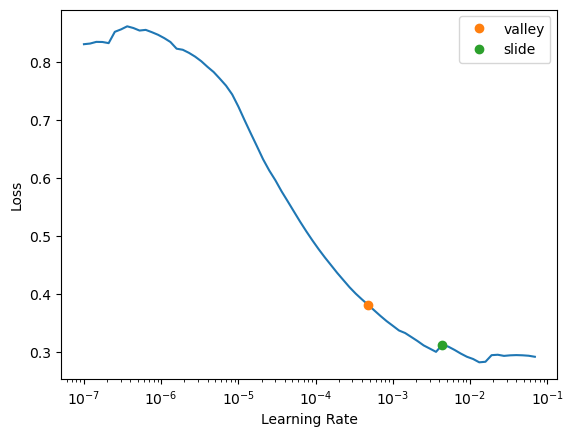

In [15]:
# Create a DataBlock for keypoint regression
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_x=ColReader('name'),
                   get_y=ColReader('coordinate'),
                   splitter=RandomSplitter(),
                   item_tfms=Resize(256))

# Create a DataLoaders object
model = create_model('swinv2_base_window8_256', pretrained=True, num_classes=8)
dls = dblock.dataloaders(train_df, bs=16)
# dls.show_batch()
learn = Learner(dls, model, metrics=mae).to_fp16()
learning_rate = learn.lr_find(suggest_funcs=(valley, slide))

In [16]:
learn.fine_tune(10, learning_rate[0])

epoch,train_loss,valid_loss,mae,time
0,0.051297,0.016343,0.093599,13:25


epoch,train_loss,valid_loss,mae,time
0,0.018672,0.013124,0.084544,12:34
1,0.020206,0.014560,0.094513,12:30
2,0.018962,0.014533,0.091907,12:37


KeyboardInterrupt: 

/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


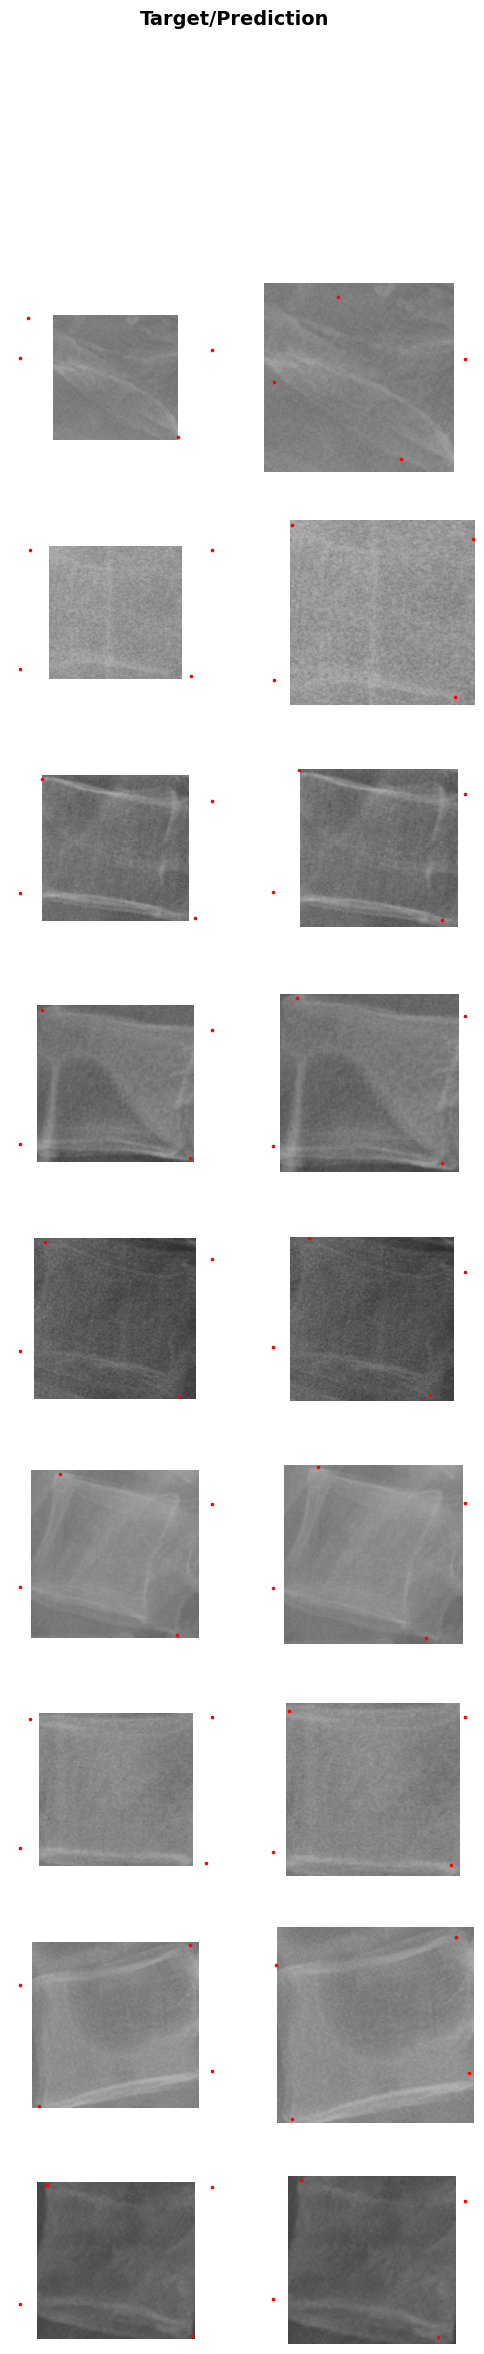

In [18]:
learn.show_results()

In [19]:
learn.export('/root/hackathon/20230617_FinalLumbarSpine/point_model/LA_points.pkl')

## S1

In [20]:
import glob

csv_list = sorted(glob.glob(os.path.join(S1_DIR, '*.csv')))

data_frames = []
for file_path in csv_list:
    data = pd.read_csv(file_path)
    data_frames.append(data)

combined_df = pd.concat(data_frames, ignore_index=True)
combined_df

,name,x1,y1,x2,y2,min_x,min_y,max_x,max_y
0,2000_4,36,155,235,39,452,1474,682,1624
1,2001_4,38,120,191,28,519,1126,705,1241
2,2002_4,39,153,126,14,816,1142,937,1290
3,2003_4,50,151,189,21,1071,1265,1255,1411
4,2004_4,17,124,102,24,1137,1553,1234,1672
...,...,...,...,...,...,...,...,...,...
1595,3595_4,42,160,253,39,983,1665,1231,1820
1596,3596_4,21,154,209,39,550,1548,755,1697
1597,3597_4,62,192,278,46,712,1680,985,1867
1598,3598_4,71,125,258,18,1023,1626,1276,1746


In [21]:
combined_df.to_csv(os.path.join(TGT_DIR, 'S1_crop.csv'), index=False)

In [22]:
import pandas as pd
import os

# np.random.seed(42)
s1_df = pd.read_csv(os.path.join(TGT_DIR, 'S1_crop.csv'))
# s1_df = s1_df.sample(n=2000).reset_index(drop=True)
s1_df

,name,x1,y1,x2,y2,min_x,min_y,max_x,max_y
0,2000_4,36,155,235,39,452,1474,682,1624
1,2001_4,38,120,191,28,519,1126,705,1241
2,2002_4,39,153,126,14,816,1142,937,1290
3,2003_4,50,151,189,21,1071,1265,1255,1411
4,2004_4,17,124,102,24,1137,1553,1234,1672
...,...,...,...,...,...,...,...,...,...
1595,3595_4,42,160,253,39,983,1665,1231,1820
1596,3596_4,21,154,209,39,550,1548,755,1697
1597,3597_4,62,192,278,46,712,1680,985,1867
1598,3598_4,71,125,258,18,1023,1626,1276,1746


In [23]:
from fastai.vision.all import *
from fastai.callback import *
import fastai
import cv2
import glob
import pandas as pd
import os
from torchvision import transforms
import timm
import timm.optim
from timm.data.transforms_factory import create_transform
from torch.optim import lr_scheduler
from fastai.vision.all import *
from timm import create_model
from fastai.metrics import mae
import shutil
from tqdm import tqdm

train_df = s1_df.copy()
train_df['name'] = train_df['name'].apply(lambda n: os.path.join(TGT_DIR, n+'.jpg'))

def getPointCoordinates(filename):
    singleDFEntry = train_df[train_df.name == filename]
    onlyDFCoordinates = singleDFEntry.drop(columns=['name', 'min_x', 'min_y', 'max_x', 'max_y'])
    numpyMatrix = onlyDFCoordinates.values.reshape(-1,2)
    numpyMatrix[:, 0], numpyMatrix[:, 1] = numpyMatrix[:, 0], numpyMatrix[:, 1].copy()
    return torch.from_numpy(numpyMatrix).float()

coordinates = []
for row in range(train_df.shape[0]):
    name_image = train_df.iloc[row, 0]
    coordinate = [tuple(arr) for arr in getPointCoordinates(name_image)]
    coordinates.append(coordinate)

df_path = pd.DataFrame(train_df['name'])
df_coordinate = pd.DataFrame({'coordinate':coordinates})
train_df = pd.concat([df_path,df_coordinate],axis=1)

train_df.head(3)



# coordinates_tensor = torch.tensor(train_df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']].values, dtype=torch.float)
# # train_df['coordinates'] = coordinates_tensor
# train_df

,name,coordinate
0,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA/2000_4.jpg,"[(tensor(36.), tensor(155.)), (tensor(235.), tensor(39.))]"
1,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA/2001_4.jpg,"[(tensor(38.), tensor(120.)), (tensor(191.), tensor(28.))]"
2,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/LA/2002_4.jpg,"[(tensor(39.), tensor(153.)), (tensor(126.), tensor(14.))]"


In [24]:
timm.list_models("*dense*")

['densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264d',
 'densenetblur121d']

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    torch.cuda.set_device(0)

/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


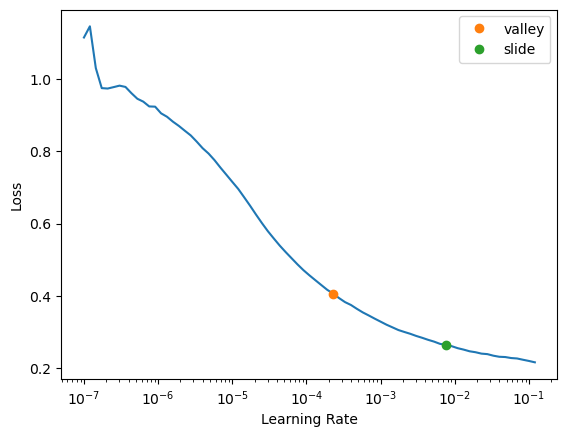

In [26]:
# Create a DataBlock for keypoint regression
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_x=ColReader('name'),
                   get_y=ColReader('coordinate'),
                   splitter=RandomSplitter(),
                   item_tfms=Resize(256))

# Create a DataLoaders object
model = create_model('swinv2_base_window8_256', pretrained=True, num_classes=4)
dls = dblock.dataloaders(train_df, bs=16)
# dls.show_batch()
learn = Learner(dls, model, metrics=mae).to_fp16()
learning_rate = learn.lr_find(suggest_funcs=(valley, slide))

In [27]:
learn.fine_tune(10, learning_rate[0])

epoch,train_loss,valid_loss,mae,time
0,0.076949,0.033656,0.136723,10:26


epoch,train_loss,valid_loss,mae,time
0,0.037219,0.026953,0.123209,12:52


KeyboardInterrupt: 

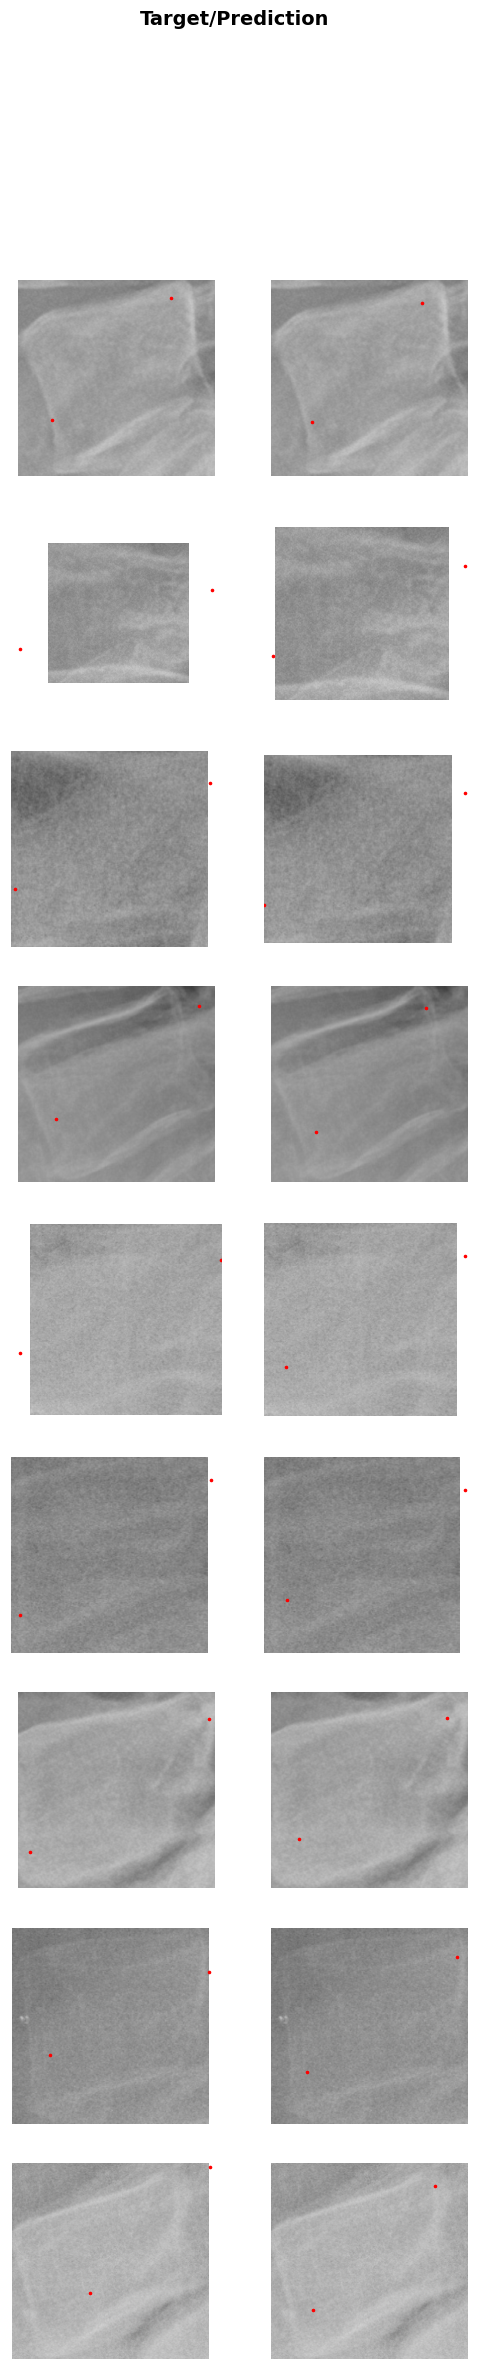

In [28]:
learn.show_results()

In [ ]:
learn.export('/root/hackathon/20230617_FinalLumbarSpine/point_model/LA_points.pkl')

# TEST

In [ ]:
import pandas as pd
result = pd.read_csv('/root/hackathon/20230617_FinalLumbarSpine/submit/normal_yolo.csv')

IMAGE_PATH = '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/test'
NEW_IMAGE_PATH = '/root/hackathon/crop_test'

In [ ]:
result = result[400:]
result